In [7]:
import numpy as np
from cv2 import *
from matplotlib import pyplot as plt

In [8]:
img = imread('./assets/bolhas.png',IMREAD_GRAYSCALE) #get picture in grayscale

if img is None: #checks picture has been apened 
    sys.exit("Could not read the image.")


img_original = img.copy() # copy original
[width, height] = img.shape # data_img 
realce = np.zeros(img.shape, img.dtype) 
mask = np.zeros((height+2, width+2), img.dtype) #mask for feedfill
[width_mask, height_mask] = mask.shape #data mask

SystemExit: Could not read the image.

In [3]:
"""
remove all figures that are at the edge of the x axis
"""
scale_y = (0,height-1) # fist line and last line the 'scale_y'
for i in range(2):
    for j in range(width-1):
        if img[scale_y[i]][j] == 255: # [y,x] =  matriz |fist line the scale_y         and travels the entire x axis   
            p = (j,scale_y[i]) # [x,y] = point | x=j and scaly_y[i] = y 
            floodFill(image=img, mask=mask, seedPoint=p, newVal=0) #paint                  black the figures that have this point


"""
remove all figures that are at the edge of the y-axis
"""
scale_x = (0,width-1)

for i in range(2):
    for j in range(height):
        if img[j,scale_x[i]] == 255:
            p = (scale_x[i],j)
            floodFill(image=img, mask=mask, seedPoint=p, newVal=0)

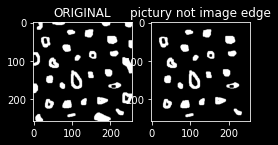

In [4]:
plt.subplot(231),plt.imshow(img_original, 'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(img, 'gray'),plt.title('pictury not image edge')
plt.show()

In [5]:
objects = 0
#busca objetos presentes
for i in range(height):
    for j in range(width):
        if img[i][j] == 255:
            # achou um objeto
            objects+=1
            p = (j,i)
            #preenche o objeto com o contador
            floodFill(image=img, mask=mask, seedPoint=p, newVal=objects)
            img_flood = img.copy()
print('a figura tem ',objects, 'bolhas')


a figura tem  21 bolhas


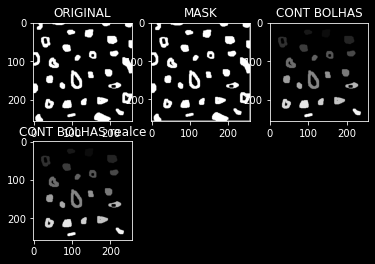

In [6]:
plt.subplot(231),plt.imshow(img_original, 'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(mask, 'gray'),plt.title('MASK')
plt.subplot(233),plt.imshow(img_flood, 'gray'),plt.title('CONT BOLHAS')
equalizeHist(img,realce)
plt.subplot(234),plt.imshow(img, 'gray'),plt.title('CONT BOLHAS realce')
plt.show()

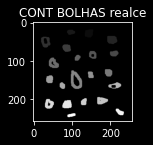

In [7]:
plt.subplot(234),plt.imshow(img, 'gray'),plt.title('CONT BOLHAS realce')
plt.show()

In [8]:
# mask = np.zeros((height+2, width+2), img.dtype) #mask for feedfill
# for i in range(height):
#     for j in range(width):
#         if img[i][j] == 0:
#             p = (j,i)
floodFill(image=img, mask=mask, seedPoint=(0,0), newVal=255)
        #     break
        # break

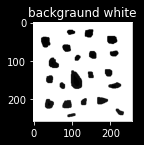

In [10]:
plt.subplot(234),plt.imshow(img, 'gray'),plt.title('backgraund white')
plt.show()

bubbles whith holes 7


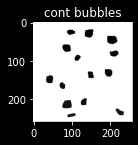

In [11]:
bubbles_holes=0
for i in range(height):
    for j in range(width):
        if img[i][j] == 0:
            bubbles_holes+=1
            p = (j,i)
            p2 = (j-1,i)
            floodFill(image=img, mask=mask, seedPoint=p, newVal=255)
            floodFill(image=img, mask=mask, seedPoint=p2, newVal=255)
print('bubbles whith holes', bubbles_holes)
plt.subplot(234),plt.imshow(img, 'gray'),plt.title('cont bubbles')
plt.show()